In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import re

In [2]:
matplotlib.rcParams.update({'font.size': 11})

## First order bending

In [3]:
df1 = pd.read_csv(r'..\Final_data\First_order_bending\rectangular_filleted_first_order_bending_displacement_final.csv', header = None, skiprows = 9)
column_name = pd.read_csv(r'..\Final_data\First_order_bending\rectangular_filleted_first_order_bending_displacement_final.csv', header = None, nrows = 1, skiprows = 8)
column_name = np.squeeze(column_name.values)
new_column_name = ['X (mm)', 'Y (mm)', 'Z (mm)']
for i in range(3, np.shape(column_name)[0], 2):
    new_column_name.append(','.join(column_name[i:i+2]))
df1.columns = new_column_name
df1 = df1.round({'X (mm)': 1, 'Y (mm)': 1, 'Z (mm)': 1})
df1.sort_values(by = ['X (mm)', 'Y (mm)', 'Z (mm)'], inplace = True)
df1.reset_index(drop = True, inplace = True)
df1

X (mm)  Y (mm)  Z (mm)  w (mm) @ L1=1, F1=1.01  \
0          0.0     0.0     0.0                0.000000   
1          0.0     0.0     0.1                0.000000   
2          0.0     0.0     0.2                0.000000   
3          0.0     0.0     0.3                0.000000   
4          0.0     0.0     0.4                0.000000   
...        ...     ...     ...                     ...   
168505    41.0     4.0     0.5               -1.688472   
168506    41.0     4.0     0.6               -1.688435   
168507    41.0     4.0     0.7               -1.688404   
168508    41.0     4.0     0.8               -1.688378   
168509    41.0     4.0     0.9               -1.688359   

        w (mm) @ L1=1.1, F1=1.01  w (mm) @ L1=1.2, F1=1.01  \
0                       0.000000                  0.000000   
1                       0.000000                  0.000000   
2                       0.000000                  0.000000   
3                       0.000000                  0.000000   
4                       0.000000                  0.000000   
...                          ...                       ...   
168505                 -1.774217                 -1.860149   
168506                 -1.774191                 -1.860133   
168507                 -1.774171                 -1.860123   
168508                 -1.774152                 -1.860108   
168509                 -1.774134                 -1.860092   

        w (mm) @ L1=1.3, F1=1  w (mm) @ L1=1.4, F1=1  w (mm) @ L1=1.5, F1=1  \
0                    0.000000               0.000000          -5.641193e-21   
1                    0.000000               0.000000           0.000000e+00   
2                    0.000000               0.000000           0.000000e+00   
3                    0.000000               0.000000           0.000000e+00   
4                    0.000000               0.000000           0.000000e+00   
...                       ...                    ...                    ...   
168505              -1.926946              -2.012393          -2.097955e+00   
168506              -1.926941              -2.012398          -2.097959e+00   
168507              -1.926936              -2.012395          -2.097957e+00   
168508              -1.926924              -2.012387          -2.097954e+00   
168509              -1.926911              -2.012378          -2.097949e+00   

        w (mm) @ L1=1.6, F1=1  w (mm) @ L1=1.7, F1=1  \
0                3.602023e-21               0.000000   
1                0.000000e+00               0.000000   
2                0.000000e+00               0.000000   
3                0.000000e+00               0.000000   
4                0.000000e+00               0.000000   
...                       ...                    ...   
168505          -2.183675e+00              -2.269563   
168506          -2.183677e+00              -2.269564   
168507          -2.183677e+00              -2.269564   
168508          -2.183676e+00              -2.269563   
168509          -2.183674e+00              -2.269562   

        w (mm) @ L1=1.8, F1=0.99  w (mm) @ L1=1.9, F1=0.99  \
0                  -7.523438e-21                  0.000000   
1                  -6.014296e-22                  0.000000   
2                   5.234667e-21                  0.000000   
3                  -3.086156e-22                  0.000000   
4                  -3.175797e-21                  0.000000   
...                          ...                       ...   
168505             -2.332040e+00                 -2.417355   
168506             -2.332042e+00                 -2.417358   
168507             -2.332042e+00                 -2.417359   
168508             -2.332042e+00                 -2.417360   
168509             -2.332042e+00                 -2.417360   

        w (mm) @ L1=2, F1=0.99  w (mm) @ L1=2.1, F1=0.99  \
0                -3.657678e-21              1.656107e-21   
1                 0.000000e+00              0.000000e+00   
2                 0

In [4]:
df2 = pd.read_csv(r'..\Final_data\First_order_bending\rectangular_filleted_first_order_bending_stress_final.csv', skiprows = 4)
df2.rename(columns = {'% Flexure length (mm)': 'Flexure length (mm)'}, inplace = True)
df2 = df2.round({'Flexure length (mm)': 1, 'Applied force (N)': 2})
df2

Flexure length (mm)  Applied force (N)  Max von Mises stress (N/m^2)
0                   1.0               1.01                  1.686360e+08
1                   1.1               1.01                  1.707385e+08
2                   1.2               1.01                  1.716227e+08
3                   1.3               1.00                  1.703969e+08
4                   1.4               1.00                  1.713907e+08
5                   1.5               1.00                  1.736069e+08
6                   1.6               1.00                  1.754137e+08
7                   1.7               1.00                  1.766837e+08
8                   1.8               0.99                  1.772840e+08
9                   1.9               0.99                  1.767763e+08
10                  2.0               0.99                  1.786642e+08
11                  2.1               0.99                  1.808487e+08
12                  2.2               0.98                  1.803909e+08
13                  2.3               0.98                  1.811065e+08

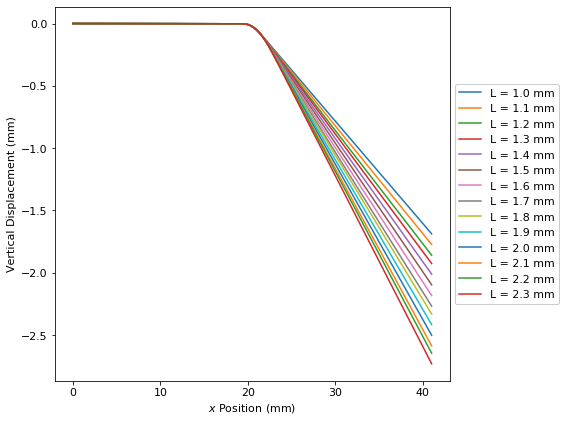

In [5]:
n = df1.shape[1] - 3
gradient = np.zeros(n)
pivot = np.zeros(n)

fig, ax = plt.subplots(1, 1, figsize = (8, 6))
for i in range(n):
    colname = df1.columns[i+3]
    l = float(re.findall(r'L1=(\d\.?\d*)', colname)[0])
    x_lim = 20.0 + l
    df_process = df1[['X (mm)', 'Y (mm)', 'Z (mm)', colname]].copy()
    df_process = df_process[df_process['Z (mm)'] <= 0.8]
    df_process = df_process.drop(columns = ['Y (mm)', 'Z (mm)'])
    df_process = df_process.groupby(['X (mm)']).mean()
    df_process.reset_index(inplace = True)
    coe = np.polyfit(df_process[df_process['X (mm)'] >= x_lim]['X (mm)'], df_process[df_process['X (mm)'] >= x_lim][colname], 1)
    gradient[i] = np.abs(coe[0])
    pivot[i] = -coe[1] / coe[0]
    ax.plot(df_process['X (mm)'], df_process[colname], '-', label = 'L = {:.1f} mm'.format(l))

ax.set_xlabel(r'$x$ Position (mm)')
ax.set_ylabel('Vertical Displacement (mm)')

ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 1, framealpha = 1)

plt.tight_layout()
plt.show()

In [6]:
df2['X rotation pivot (mm)'] = pivot
df2['Torque (Nm)'] = df2['Applied force (N)'] * (df2['Flexure length (mm)'] + 40.0 - pivot) * 0.001
df2['Deflection angle (°)'] = np.arctan(gradient) * 180.0 / np.pi
df2['1st order stiffness (Nm/°)'] = df2['Torque (Nm)'] / df2['Deflection angle (°)']
df2['Normalised 1st order stress (N/m^2°)'] = df2['Max von Mises stress (N/m^2)'] / df2['Deflection angle (°)']
df2

Flexure length (mm)  Applied force (N)  Max von Mises stress (N/m^2)  \
0                   1.0               1.01                  1.686360e+08   
1                   1.1               1.01                  1.707385e+08   
2                   1.2               1.01                  1.716227e+08   
3                   1.3               1.00                  1.703969e+08   
4                   1.4               1.00                  1.713907e+08   
5                   1.5               1.00                  1.736069e+08   
6                   1.6               1.00                  1.754137e+08   
7                   1.7               1.00                  1.766837e+08   
8                   1.8               0.99                  1.772840e+08   
9                   1.9               0.99                  1.767763e+08   
10                  2.0               0.99                  1.786642e+08   
11                  2.1               0.99                  1.808487e+08   
12                  2.2               0.98                  1.803909e+08   
13                  2.3               0.98                  1.811065e+08   

    X rotation pivot (mm)  Torque (Nm)  Deflection angle (°)  \
0               20.454472     0.020751              4.696704   
1               20.503780     0.020802              4.946047   
2               20.552942     0.020854              5.196881   
3               20.601986     0.020698              5.395429   
4               20.650884     0.020749              5.646759   
5               20.699664     0.020800              5.899356   
6               20.748333     0.020852              6.153334   
7               20.796892     0.020903              6.408722   
8               20.845350     0.020745              6.599387   
9               20.893703     0.020796              6.854937   
10              20.941964     0.020847              7.111799   
11              20.990136     0.020899              7.370029   
12              21.038210     0.020739              7.553312   
13              21.086203     0.020790              7.811482   

    1st order stiffness (Nm/°)  Normalised 1st order stress (N/m^2°)  
0                     0.004418                          3.590518e+07  
1                     0.004206                          3.452019e+07  
2                     0.004013                          3.302418e+07  
3                     0.003836                          3.158172e+07  
4                     0.003675                          3.035206e+07  
5                     0.003526                          2.942812e+07  
6                     0.003389                          2.850709e+07  
7                     0.003262                          2.756925e+07  
8                     0.003143                          2.686371e+07  
9                     0.003034                          2.578817e+07  
10                    0.002931                          2.512222e+07  
11                    0.002836                          2.453840e+07  
12                    0.002746                          2.388236e+07  
13                    0.002661                          2.318465e+07

In [7]:
x = 'Flexure length (mm)'
y = '1st order stiffness (Nm/°)'

fig, ax = plt.subplots(1, 1, figsize = (8, 6))

ax.plot(df2[x], df2[y], 'r.')

ax.set_xlabel(x)
ax.set_ylabel(y)

plt.tight_layout()
plt.show()

## Second order bending

In [8]:
df3 = pd.read_csv(r'..\Final_data\Second_order_bending\rectangular_filleted_second_order_bending_displacement_final.csv', skiprows = 8)
df3.rename(columns = {'% X': 'X (mm)', 'Y': 'Y (mm)', 'Z': 'Z (mm)'}, inplace = True)
df3 = df3.round({'X (mm)': 1, 'Y (mm)': 1, 'Z (mm)': 1})
df3.sort_values(by = ['X (mm)', 'Y (mm)', 'Z (mm)'], inplace = True)
df3.reset_index(drop = True, inplace = True)
df3

X (mm)  Y (mm)  Z (mm)  w (mm) @ L1=1  w (mm) @ L1=1.1  \
0          0.0     0.0     0.0       0.000000         0.000000   
1          0.0     0.0     0.1       0.000000         0.000000   
2          0.0     0.0     0.2       0.000000         0.000000   
3          0.0     0.0     0.3       0.000000         0.000000   
4          0.0     0.0     0.4       0.000000         0.000000   
...        ...     ...     ...            ...              ...   
168505    41.0     4.0     0.5      -0.147025        -0.155204   
168506    41.0     4.0     0.6      -0.146111        -0.154491   
168507    41.0     4.0     0.7      -0.145360        -0.153940   
168508    41.0     4.0     0.8      -0.144771        -0.153435   
168509    41.0     4.0     0.9      -0.144318        -0.152913   

        w (mm) @ L1=1.2  w (mm) @ L1=1.3  w (mm) @ L1=1.4  w (mm) @ L1=1.5  \
0              0.000000         0.000000         0.000000    -1.129206e-19   
1              0.000000         0.000000         0.000000     0.000000e+00   
2              0.000000         0.000000         0.000000     0.000000e+00   
3              0.000000         0.000000         0.000000     0.000000e+00   
4              0.000000         0.000000         0.000000     0.000000e+00   
...                 ...              ...              ...              ...   
168505        -0.164093        -0.173723        -0.184093    -1.953070e-01   
168506        -0.163581        -0.173417        -0.183978    -1.952192e-01   
168507        -0.163235        -0.173147        -0.183766    -1.950529e-01   
168508        -0.162771        -0.172757        -0.183474    -1.948571e-01   
168509        -0.162274        -0.172338        -0.183146    -1.946317e-01   

        w (mm) @ L1=1.6  w (mm) @ L1=1.7  w (mm) @ L1=1.8  w (mm) @ L1=1.9  \
0          7.267339e-20         0.000000    -1.543435e-19         0.000000   
1          0.000000e+00         0.000000    -7.167854e-21         0.000000   
2          0.000000e+00         0.000000     1.158223e-19         0.000000   
3          0.000000e+00         0.000000    -3.636256e-21         0.000000   
4          0.000000e+00         0.000000    -6.694536e-20         0.000000   
...                 ...              ...              ...              ...   
168505    -2.074198e-01        -0.220449    -2.344604e-01        -0.249503   
168506    -2.073463e-01        -0.220392    -2.344432e-01        -0.249513   
168507    -2.072435e-01        -0.220288    -2.343799e-01        -0.249483   
168508    -2.071134e-01        -0.220176    -2.343070e-01        -0.249441   
168509    -2.069562e-01        -0.220054    -2.342244e-01        -0.249387   

        w (mm) @ L1=2  w (mm) @ L1=2.1  w (mm) @ L1=2.2  w (mm) @ L1=2.3  
0       -7.448243e-20     3.454003e-20    -7.529091e-20         0.000000  
1        0.000000e+00     0.000000e+00     0.000000e+00         0.000000  
2        0.000000e+00     0.000000e+00     0.000000e+00         0.000000  
3        0.000000e+00     0.000000e+00     0.000000e+00         0.000000  
4        0.000000e+00     0.000000e+00     0.000000e+00         0.000000  
...               ...              ...              ...              ...  
168505  -2.656312e-01    -2.828045e-01    -3.011548e-01        -0.320631  
168506  -2.656530e-01    -2.828441e-01    -3.012025e-01        -0.320690  
168507  -2.656539e-01    -2.828724e-01    -3.012465e-01        -0.320734  
168508  -2.656395e-01    -2.828894e-01    -3.012693e-01        -0.320765  
168509  -2.656097e-01    -2.828860e-01    -3.012729e-01        -0.320782  

[168510 rows x 17 columns]

In [9]:
df4 = pd.read_csv(r'..\Final_data\Second_order_bending\rectangular_filleted_second_order_bending_stress_final.csv', skiprows = 4)
df4.rename(columns = {'% Flexure length (mm)': 'Flexure length (mm)'}, inplace = True)
df4['Applied force (N)'] = np.full(df4.shape[0], 35.0).round(1)
df4 = df4.round({'Flexure length (mm)': 1, 'Applied force (N)': 1})
df4

Flexure length (mm)  Max von Mises stress (N/m^2)  Applied force (N)
0                   1.0                  2.109458e+08               35.0
1                   1.1                  2.232516e+08               35.0
2                   1.2                  2.381979e+08               35.0
3                   1.3                  2.499168e+08               35.0
4                   1.4                  2.625304e+08               35.0
5                   1.5                  2.750883e+08               35.0
6                   1.6                  2.891311e+08               35.0
7                   1.7                  3.022718e+08               35.0
8                   1.8                  3.182191e+08               35.0
9                   1.9                  3.277654e+08               35.0
10                  2.0                  3.443788e+08               35.0
11                  2.1                  3.589940e+08               35.0
12                  2.2                  3.691546e+08               35.0
13                  2.3                  3.839022e+08               35.0

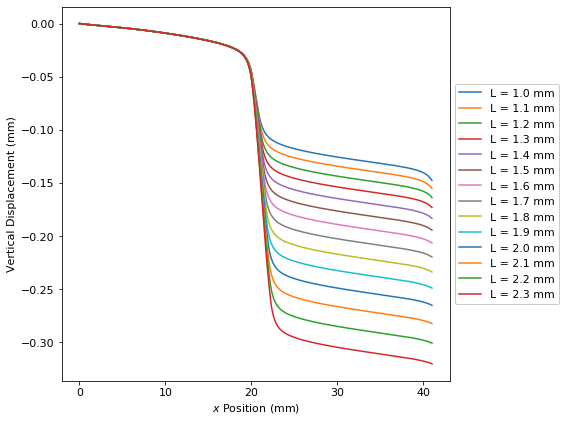

In [10]:
n = df3.shape[1] - 3
displacement = np.zeros(n)

fig, ax = plt.subplots(1, 1, figsize = (8, 6))
for i in range(n):
    colname = df3.columns[i+3]
    l = float(re.findall(r'L1=(\d\.?\d*)', colname)[0])
    x_lim = math.ceil(10.0 * (20.0 + l)) / 10.0
    df_process = df3[['X (mm)', 'Y (mm)', 'Z (mm)', colname]].copy()
    df_process = df_process[df_process['Z (mm)'] <= 0.8]
    df_process = df_process.drop(columns = ['Y (mm)', 'Z (mm)'])
    df_process = df_process.groupby(['X (mm)']).mean()
    df_process.reset_index(inplace = True)
    displacement[i] = (df_process[df_process['X (mm)'] == 20.0][colname].values[0] - df_process[df_process['X (mm)'] == x_lim][colname].values[0]) * 0.001
    ax.plot(df_process['X (mm)'], df_process[colname], '-', label = 'L = {:.1f} mm'.format(l))

ax.set_xlabel(r'$x$ Position (mm)')
ax.set_ylabel('Vertical Displacement (mm)')

ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 1, framealpha = 1)

plt.tight_layout()
plt.show()

In [11]:
df4['Displacement (m)'] = displacement
df4['2nd order stiffness (N/m)'] = df4['Applied force (N)'] / df4['Displacement (m)']
df4['Normalised 2nd order stress (N/m^3)'] = df4['Max von Mises stress (N/m^2)'] / df4['Displacement (m)']
df4

Flexure length (mm)  Max von Mises stress (N/m^2)  Applied force (N)  \
0                   1.0                  2.109458e+08               35.0   
1                   1.1                  2.232516e+08               35.0   
2                   1.2                  2.381979e+08               35.0   
3                   1.3                  2.499168e+08               35.0   
4                   1.4                  2.625304e+08               35.0   
5                   1.5                  2.750883e+08               35.0   
6                   1.6                  2.891311e+08               35.0   
7                   1.7                  3.022718e+08               35.0   
8                   1.8                  3.182191e+08               35.0   
9                   1.9                  3.277654e+08               35.0   
10                  2.0                  3.443788e+08               35.0   
11                  2.1                  3.589940e+08               35.0   
12                  2.2                  3.691546e+08               35.0   
13                  2.3                  3.839022e+08               35.0   

    Displacement (m)  2nd order stiffness (N/m)  \
0           0.000045              772200.295971   
1           0.000053              659397.394142   
2           0.000062              568537.853640   
3           0.000071              494302.040261   
4           0.000081              432873.359891   
5           0.000092              381529.925801   
6           0.000103              338208.347419   
7           0.000116              301350.692503   
8           0.000130              269766.095185   
9           0.000144              242523.915614   
10          0.000160              218885.003403   
11          0.000177              198258.992429   
12          0.000194              180176.923654   
13          0.000213              164250.086283   

    Normalised 2nd order stress (N/m^3)  
0                          4.654068e+12  
1                          4.206043e+12  
2                          3.869272e+12  
3                          3.529554e+12  
4                          3.246926e+12  
5                          2.998698e+12  
6                          2.793902e+12  
7                          2.602566e+12  
8                          2.452707e+12  
9                          2.271170e+12  
10                         2.153696e+12  
11                         2.033537e+12  
12                         1.900375e+12  
13                         1.801599e+12

In [12]:
x = 'Flexure length (mm)'
y = '2nd order stiffness (N/m)'

fig, ax = plt.subplots(1, 1, figsize = (8, 6))

ax.plot(df4[x], df4[y], 'r.')

ax.set_xlabel(x)
ax.set_ylabel(y)

plt.tight_layout()
plt.show()

## Performance characterisation

In [13]:
df5 = df2[['Flexure length (mm)', 'X rotation pivot (mm)', 'Deflection angle (°)', '1st order stiffness (Nm/°)', 'Normalised 1st order stress (N/m^2°)']].copy()
df5['1st order max stress (N/m^2)'] = df2['Max von Mises stress (N/m^2)']
df5['Displacement (m)'] = df4['Displacement (m)']
df5['2nd order stiffness (N/m)'] = df4['2nd order stiffness (N/m)']
df5['2nd order max stress (N/m^2)'] = df4['Max von Mises stress (N/m^2)']
df5

Flexure length (mm)  X rotation pivot (mm)  Deflection angle (°)  \
0                   1.0              20.454472              4.696704   
1                   1.1              20.503780              4.946047   
2                   1.2              20.552942              5.196881   
3                   1.3              20.601986              5.395429   
4                   1.4              20.650884              5.646759   
5                   1.5              20.699664              5.899356   
6                   1.6              20.748333              6.153334   
7                   1.7              20.796892              6.408722   
8                   1.8              20.845350              6.599387   
9                   1.9              20.893703              6.854937   
10                  2.0              20.941964              7.111799   
11                  2.1              20.990136              7.370029   
12                  2.2              21.038210              7.553312   
13                  2.3              21.086203              7.811482   

    1st order stiffness (Nm/°)  Normalised 1st order stress (N/m^2°)  \
0                     0.004418                          3.590518e+07   
1                     0.004206                          3.452019e+07   
2                     0.004013                          3.302418e+07   
3                     0.003836                          3.158172e+07   
4                     0.003675                          3.035206e+07   
5                     0.003526                          2.942812e+07   
6                     0.003389                          2.850709e+07   
7                     0.003262                          2.756925e+07   
8                     0.003143                          2.686371e+07   
9                     0.003034                          2.578817e+07   
10                    0.002931                          2.512222e+07   
11                    0.002836                          2.453840e+07   
12                    0.002746                          2.388236e+07   
13                    0.002661                          2.318465e+07   

    1st order max stress (N/m^2)  Displacement (m)  2nd order stiffness (N/m)  \
0                   1.686360e+08          0.000045              772200.295971   
1                   1.707385e+08          0.000053              659397.394142   
2                   1.716227e+08          0.000062              568537.853640   
3                   1.703969e+08          0.000071              494302.040261   
4                   1.713907e+08          0.000081              432873.359891   
5                   1.736069e+08          0.000092              381529.925801   
6                   1.754137e+08          0.000103              338208.347419   
7                   1.766837e+08          0.000116              301350.692503   
8                   1.772840e+08          0.000130              269766.095185   
9                   1.767763e+08          0.000144              242523.915614   
10                  1.786642e+08          0.000160              218885.003403   
11                  1.808487e+08          0.000177              198258.992429   
12                  1.803909e+08          0.000194              180176.923654   
13                  1.811065e+08          0.000213              164250.086283   

    2nd order max stress (N/m^2)  
0                   2.109458e+08  
1                   2.232516e+08  
2                   2.381979e+08  
3                   2.499168e+08  
4                   2.625304e+08  
5                   2.750883e+08  
6                   2.891311e+08  
7                   3.022718e+08  
8                   3.182191e+08  
9                   3.277654e+08  
10                  3.443788e+08  
11                  3.589940e+08  
12                  3.691546e+08  
13                  3.839022e+08

In [14]:
df5['Parameter1'] = df5['2nd order stiffness (N/m)'] / df5['1st order stiffness (Nm/°)']
df5['Parameter2'] = df5['1st order max stress (N/m^2)'] / (df5['1st order stiffness (Nm/°)'] * df5['Deflection angle (°)'])
df5['Parameter3'] = df5['2nd order max stress (N/m^2)'] / (df5['2nd order stiffness (N/m)'] * df5['Displacement (m)'])
df5['Dimensionless'] = (df5['2nd order stiffness (N/m)'] / df5['1st order stiffness (Nm/°)']) * ((40.0 + df5['Flexure length (mm)'] - df5['X rotation pivot (mm)']) * 0.001)**2
df5

Flexure length (mm)  X rotation pivot (mm)  Deflection angle (°)  \
0                   1.0              20.454472              4.696704   
1                   1.1              20.503780              4.946047   
2                   1.2              20.552942              5.196881   
3                   1.3              20.601986              5.395429   
4                   1.4              20.650884              5.646759   
5                   1.5              20.699664              5.899356   
6                   1.6              20.748333              6.153334   
7                   1.7              20.796892              6.408722   
8                   1.8              20.845350              6.599387   
9                   1.9              20.893703              6.854937   
10                  2.0              20.941964              7.111799   
11                  2.1              20.990136              7.370029   
12                  2.2              21.038210              7.553312   
13                  2.3              21.086203              7.811482   

    1st order stiffness (Nm/°)  Normalised 1st order stress (N/m^2°)  \
0                     0.004418                          3.590518e+07   
1                     0.004206                          3.452019e+07   
2                     0.004013                          3.302418e+07   
3                     0.003836                          3.158172e+07   
4                     0.003675                          3.035206e+07   
5                     0.003526                          2.942812e+07   
6                     0.003389                          2.850709e+07   
7                     0.003262                          2.756925e+07   
8                     0.003143                          2.686371e+07   
9                     0.003034                          2.578817e+07   
10                    0.002931                          2.512222e+07   
11                    0.002836                          2.453840e+07   
12                    0.002746                          2.388236e+07   
13                    0.002661                          2.318465e+07   

    1st order max stress (N/m^2)  Displacement (m)  2nd order stiffness (N/m)  \
0                   1.686360e+08          0.000045              772200.295971   
1                   1.707385e+08          0.000053              659397.394142   
2                   1.716227e+08          0.000062              568537.853640   
3                   1.703969e+08          0.000071              494302.040261   
4                   1.713907e+08          0.000081              432873.359891   
5                   1.736069e+08          0.000092              381529.925801   
6                   1.754137e+08          0.000103              338208.347419   
7                   1.766837e+08          0.000116              301350.692503   
8                   1.772840e+08          0.000130              269766.095185   
9                   1.767763e+08          0.000144              242523.915614   
10                  1.786642e+08          0.000160              218885.003403   
11                  1.808487e+08          0.000177              198258.992429   
12                  1.803909e+08          0.000194              180176.923654   
13                  1.811065e+08          0.000213              164250.086283   

    2nd order max stress (N/m^2)    Parameter1    Parameter2    Parameter3  \
0                   2.109458e+08  1.747771e+08  8.126652e+09  6.027022e+06   
1                   2.232516e+08  1.567821e+08  8.207721e+09  6.378617e+06   
2                   2.381979e+08  1.416846e+08  8.229913e+09  6.805654e+06   
3                   2.499168e+08  1.288516e+08  8.232525e+09  7.140480e+06   
4                   2.625304e+08  1.178041e+08  8.260147e+09  7.500869e+06   
5                   2.750883e+08  1.082089e+08  8.346352e+09  7.859665e+06   
6                   2.891311e+08  9.980539e+07  8.412453e+09  8.260889e+06   
7 

In [15]:
x = 'Flexure length (mm)'
y = 'Parameter1'

fig, ax = plt.subplots(1, 1, figsize = (8, 6))

ax.plot(df5[x], df5[y], 'r.')

ax.set_xlabel(x)
ax.set_ylabel(y)

plt.tight_layout()
plt.show()

In [16]:
df6 = df2[['Flexure length (mm)', 'Deflection angle (°)', '1st order stiffness (Nm/°)', 'Normalised 1st order stress (N/m^2°)']].copy()
df6['1st order max stress (N/m^2)'] = df2['Max von Mises stress (N/m^2)']
df6['2nd order stiffness (N/m)'] = df4['2nd order stiffness (N/m)']
df6['2nd order max stress (N/m^2)'] = df4['Max von Mises stress (N/m^2)']
df6['Stiffness ratio'] = df5['Dimensionless']
df6.to_csv('rectangular_final.csv', index = False)